In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import r2_score
from seaborn import residplot

import warnings

warnings.filterwarnings('ignore')

In [2]:
def trataColunaTP_status(x):
    if (x == 1):
        return 1
    else:
        return 0
    
def verificaValoresNan(data):
    missingValues = data.isna().sum().sort_values(ascending=False)
    dfMissingValues = pd.DataFrame({"NumValorMissing": missingValues,
                                "PorcentagemValorMissing(%)": (round((missingValues/data.shape[0])*100, 2))})

    dfMissingValues = dfMissingValues[dfMissingValues["PorcentagemValorMissing(%)"] > 0]
    
    return dfMissingValues

def binarizeIdade(x):
    if x < 18:
        return 0
    else:
        return 1

In [3]:
dadosTreino = pd.read_csv("./train.csv")
dadosTreino.drop(["Unnamed: 0"], axis = 1, inplace=True)

dadosTeste = pd.read_csv("./test.csv")

In [4]:
print("Dados de treino {}".format(dadosTreino.shape))
print("Dados de teste {}".format(dadosTeste.shape))

Dados de treino (13730, 166)
Dados de teste (4576, 47)


In [5]:
dadosTreino2 = dadosTreino.loc[:, dadosTeste.columns]  
dadosTreino2["NU_NOTA_MT"] = dadosTreino["NU_NOTA_MT"]

In [6]:
dadosTreino2.shape

(13730, 48)

In [7]:
dadosTreino2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 48 columns):
NU_INSCRICAO              13730 non-null object
CO_UF_RESIDENCIA          13730 non-null int64
SG_UF_RESIDENCIA          13730 non-null object
NU_IDADE                  13730 non-null int64
TP_SEXO                   13730 non-null object
TP_COR_RACA               13730 non-null int64
TP_NACIONALIDADE          13730 non-null int64
TP_ST_CONCLUSAO           13730 non-null int64
TP_ANO_CONCLUIU           13730 non-null int64
TP_ESCOLA                 13730 non-null int64
TP_ENSINO                 4282 non-null float64
IN_TREINEIRO              13730 non-null int64
TP_DEPENDENCIA_ADM_ESC    4282 non-null float64
IN_BAIXA_VISAO            13730 non-null int64
IN_CEGUEIRA               13730 non-null int64
IN_SURDEZ                 13730 non-null int64
IN_DISLEXIA               13730 non-null int64
IN_DISCALCULIA            13730 non-null int64
IN_SABATISTA              13730 non-null

In [8]:
dadosTreino2.describe()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,...,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,NU_NOTA_MT
count,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,4282.000000,13730.000000,4282.000000,...,10133.000000,13730.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000
mean,30.736708,21.593809,2.185652,1.048871,1.782666,2.146176,1.353532,1.178888,0.129862,2.259692,...,516.472841,0.593664,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258,482.497928
std,9.862405,7.043654,1.007285,0.258895,0.880734,3.217328,0.558472,0.565490,0.336163,0.698586,...,68.688190,0.491167,0.700100,29.846017,33.737588,34.341349,33.480033,43.067140,154.294758,99.826323
min,11.000000,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,468.100000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000,408.900000
50%,31.000000,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,520.900000,1.000000,1.000000,120.000000,120.000000,120.000000,120.000000,80.000000,540.000000,461.200000
75%,35.000000,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,...,564.900000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000,537.600000
max,53.000000,67.000000,5.000000,4.000000,4.000000,10.000000,4.000000,3.000000,1.000000,4.000000,...,763.600000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000,952.000000


In [9]:
dadosTeste.describe()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,...,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,4576.000000,1480.000000,4576.000000,1480.000000,...,3442.000000,3377.000000,4576.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000,3377.000000
mean,30.762019,21.542395,2.181163,1.060970,1.791084,2.119537,1.368663,1.182432,0.127404,2.264865,...,529.195264,514.304205,0.604458,1.095943,119.626888,111.915902,106.384365,112.881256,76.683447,527.491857
std,9.912313,6.854073,1.017531,0.281289,0.875692,3.210353,0.568589,0.572495,0.333461,0.716922,...,73.086665,67.725564,0.489020,0.695047,29.028146,33.296849,33.834492,33.202244,42.985637,151.979490
min,11.000000,14.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,479.725000,468.400000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000
50%,31.000000,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,...,532.000000,516.800000,1.000000,1.000000,120.000000,120.000000,100.000000,120.000000,80.000000,540.000000
75%,35.000000,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,...,579.550000,562.400000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000
max,53.000000,65.000000,5.000000,4.000000,4.000000,10.000000,3.000000,3.000000,1.000000,4.000000,...,773.600000,708.900000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,980.000000


In [10]:
# verificando valores missing
dfTemporario = verificaValoresNan(dadosTreino2)

# Nesse primeiro caso deletei as colunas com mais de 30% de valores missing
colunasMuitoNAn = dfTemporario[dfTemporario["PorcentagemValorMissing(%)"] > 30].index

dfTemporario

,NumValorMissing,PorcentagemValorMissing(%)
TP_DEPENDENCIA_ADM_ESC,9448,68.81
TP_ENSINO,9448,68.81
Q027,7373,53.70
NU_NOTA_MT,3597,26.20
NU_NOTA_COMP5,3597,26.20
NU_NOTA_LC,3597,26.20
TP_STATUS_REDACAO,3597,26.20
NU_NOTA_COMP2,3597,26.20
NU_NOTA_COMP3,3597,26.20
NU_NOTA_COMP4,3597,26.20


In [11]:
# verificando valores missing
verificaValoresNan(dadosTeste)

,NumValorMissing,PorcentagemValorMissing(%)
TP_ENSINO,3096,67.66
TP_DEPENDENCIA_ADM_ESC,3096,67.66
Q027,2488,54.37
TP_STATUS_REDACAO,1199,26.20
NU_NOTA_COMP4,1199,26.20
NU_NOTA_LC,1199,26.20
NU_NOTA_COMP1,1199,26.20
NU_NOTA_COMP2,1199,26.20
NU_NOTA_COMP3,1199,26.20
NU_NOTA_COMP5,1199,26.20


### Tratando valores missing

In [12]:
dadosTreino2.drop(list(colunasMuitoNAn), axis=1, inplace=True)
dadosTeste.drop(list(colunasMuitoNAn), axis=1, inplace=True)

In [13]:
print("Dados de treino {}".format(dadosTreino2.shape))
print("Dados de teste {}".format(dadosTeste.shape))

Dados de treino (13730, 45)
Dados de teste (4576, 44)


In [14]:
for coluna in dadosTreino2.columns:
    if coluna[0:7] == "NU_NOTA":
        dadosTreino2[coluna] = dadosTreino2[coluna].fillna(0)
        if coluna != "NU_NOTA_MT":
            dadosTeste[coluna] = dadosTeste[coluna].fillna(0)
        
dadosTreino2["TP_STATUS_REDACAO"] = dadosTreino2["TP_STATUS_REDACAO"].apply(trataColunaTP_status)
dadosTeste["TP_STATUS_REDACAO"] = dadosTeste["TP_STATUS_REDACAO"].apply(trataColunaTP_status)

In [15]:
(dadosTreino2.corr()).loc['NU_NOTA_MT', :].sort_values(ascending = False)

NU_NOTA_MT           1.000000
NU_NOTA_LC           0.943954
TP_PRESENCA_LC       0.923641
NU_NOTA_CN           0.907039
NU_NOTA_CH           0.903608
TP_STATUS_REDACAO    0.893902
NU_NOTA_COMP1        0.882746
NU_NOTA_REDACAO      0.875929
TP_PRESENCA_CH       0.874764
TP_PRESENCA_CN       0.874764
NU_NOTA_COMP4        0.866827
NU_NOTA_COMP2        0.862709
NU_NOTA_COMP3        0.854946
NU_NOTA_COMP5        0.722275
TP_ESCOLA            0.189084
IN_TREINEIRO         0.078804
TP_ST_CONCLUSAO      0.023736
IN_DISCALCULIA       0.008392
IN_DISLEXIA          0.005259
CO_UF_RESIDENCIA     0.002613
IN_SABATISTA        -0.002457
IN_SURDEZ           -0.002617
IN_BAIXA_VISAO      -0.006546
IN_IDOSO            -0.009061
IN_GESTANTE         -0.028129
TP_NACIONALIDADE    -0.033130
TP_COR_RACA         -0.070239
TP_LINGUA           -0.111428
TP_ANO_CONCLUIU     -0.191553
NU_IDADE            -0.240874
IN_CEGUEIRA               NaN
Name: NU_NOTA_MT, dtype: float64

In [16]:
ID = dadosTeste["NU_INSCRICAO"]
colunasSemImp =  ["CO_PROVA_MT", "CO_PROVA_LC", "CO_PROVA_CH", "CO_PROVA_CN", "SG_UF_RESIDENCIA", "NU_INSCRICAO"]

dadosTreino3 = dadosTreino2.drop(colunasSemImp, axis = 1)
dadosTeste2 = dadosTeste.drop(colunasSemImp, axis = 1)

In [17]:
print("Dados de treino {}".format(dadosTreino3.shape))
print("Dados de teste {}".format(dadosTeste2.shape))

Dados de treino (13730, 39)
Dados de teste (4576, 38)


In [18]:
mapping_categoricToNumeric = {"Q001": {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "H": 8},
                              "Q002": {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "H": 8},
                              "Q12": {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "H": 8},
                              "Q006": {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "H": 8, "I": 9, "J": 10, "K": 11, "L": 12, "M": 13, "N": 14, "O": 15, "P": 16, "Q": 17},
                              "Q024": {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5},
                              "Q025": {"A": 0, "B":1},
                              "Q026": {"A": 1, "B": 2, "C": 3},
                              "Q047": {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5},
                              "TP_SEXO": {"M": 0, "F": 1}
                             }

dadosTreino3.replace(mapping_categoricToNumeric, inplace = True)
dadosTeste2.replace(mapping_categoricToNumeric, inplace = True)

### Feature Selection

In [19]:
# Separando os dados
X_train, X_test, y_train, y_test = train_test_split(dadosTreino3.drop(["NU_NOTA_MT"], axis = 1), 
                                                    dadosTreino3.NU_NOTA_MT, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [20]:
# definindo o objeto selectKBest
fs = SelectKBest(score_func=f_regression, k=15)

# aplicando a feature selection
X_selected = fs.fit_transform(X_train, y_train)

In [21]:
colunasMaisSignif = list(X_train.iloc[:, fs.get_support()].columns)
colunasMaisSignif.append("NU_NOTA_MT")

### Tratando as colunas mais relevantes

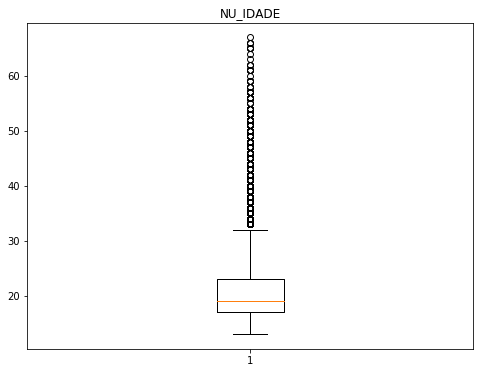

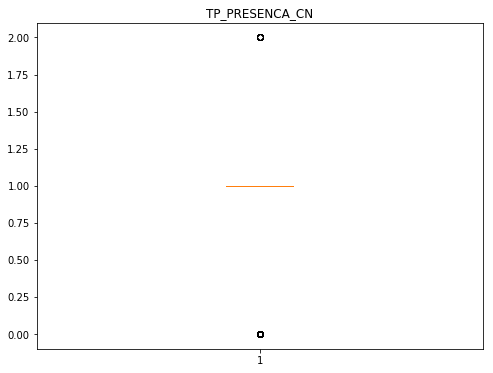

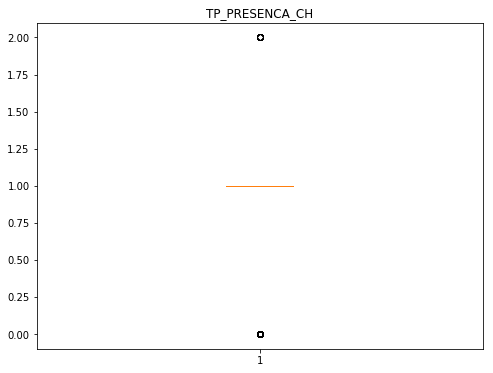

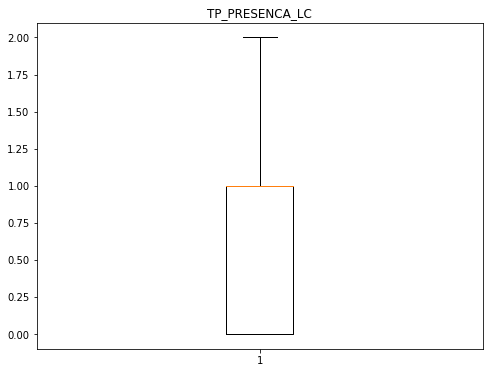

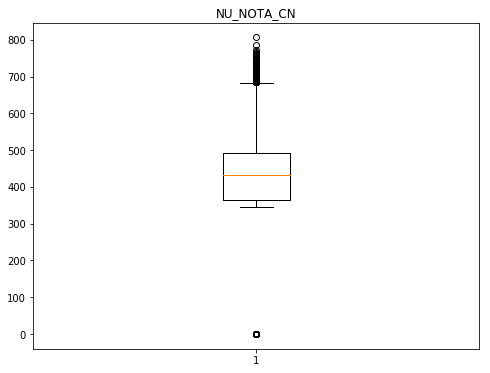

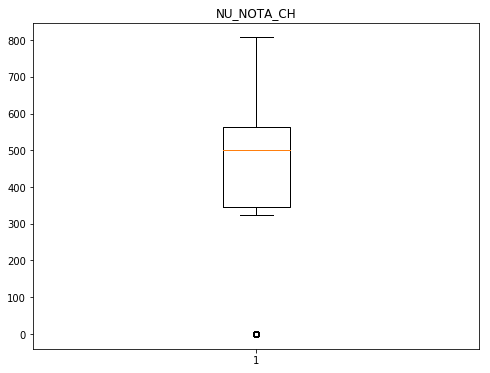

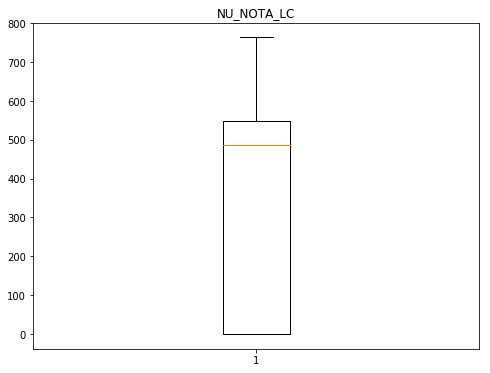

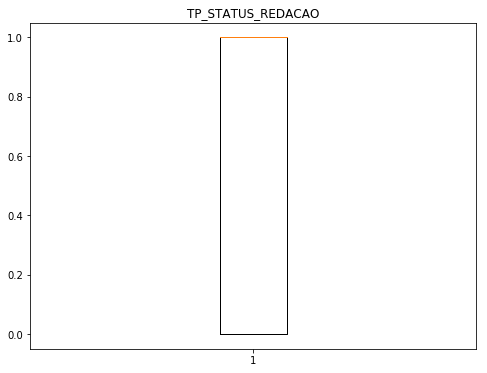

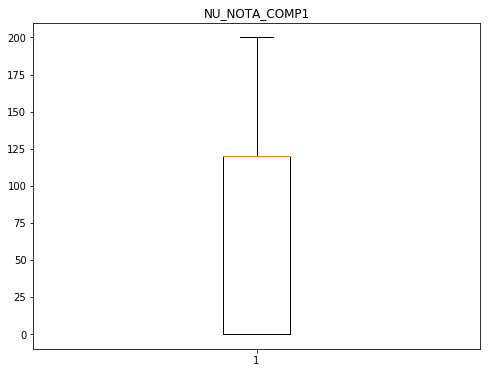

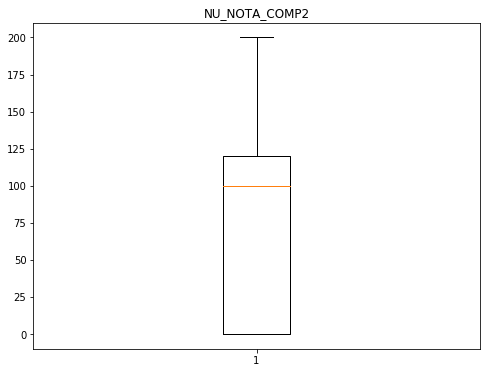

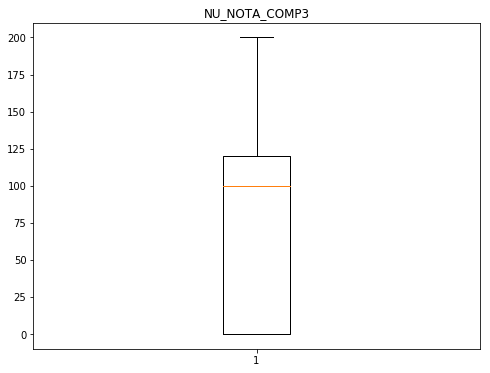

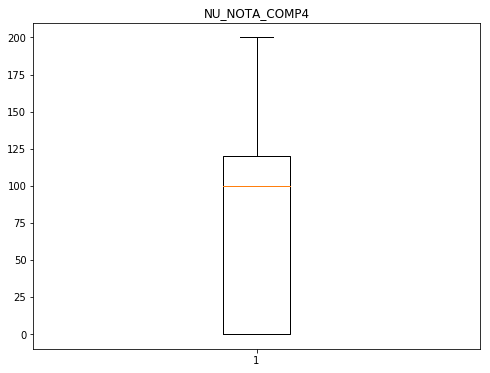

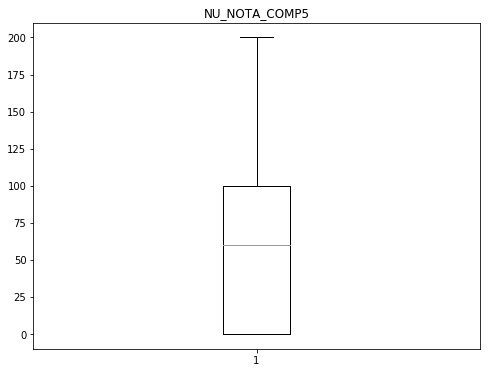

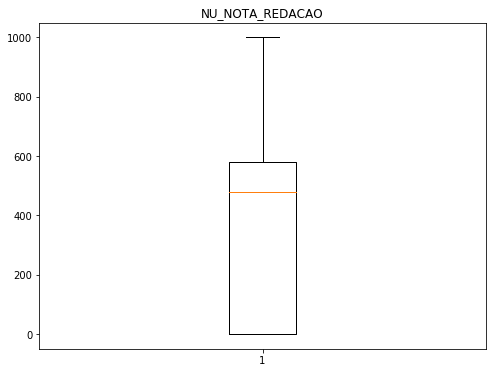

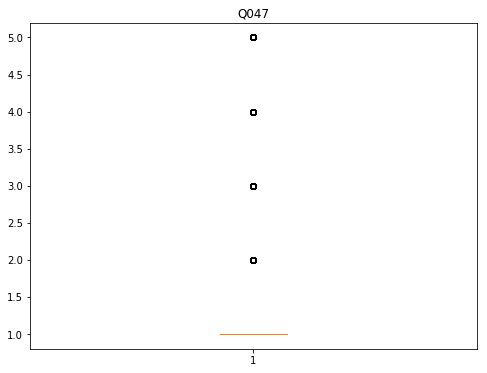

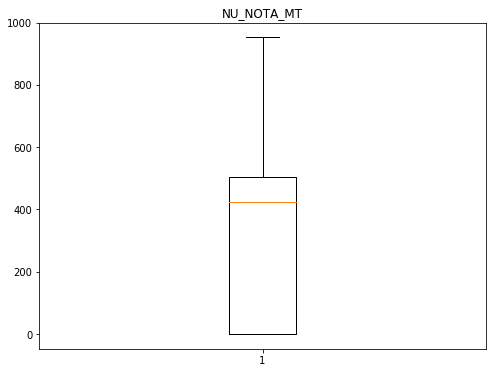

In [22]:
for coluna in colunasMaisSignif:
    plt.figure(figsize=(8, 6))
    plt.title(coluna)
    plt.boxplot(dadosTreino3[coluna])
    plt.show()

In [23]:
# Tratando alguns outliers 
dadosTreino3["NU_NOTA_CN"] = dadosTreino3["NU_NOTA_CN"].apply(lambda x: 700 if x > 700 else x)

In [24]:
# Transformando a variável NU_IDADE em binária. 
dadosTreino3["NU_IDADE"] = dadosTreino3["NU_IDADE"].apply(binarizeIdade)
dadosTeste2["NU_IDADE"] = dadosTeste2["NU_IDADE"].apply(binarizeIdade)

# Transformando a variável Q047 em binária. 
dadosTreino3["Q047"] = dadosTreino3["Q047"].apply(lambda x: 1 if x == 1 else 0)
dadosTeste2["Q047"] = dadosTeste2["Q047"].apply(lambda x: 1 if x == 1 else 0)

### Padronizando os Dados

In [25]:
colunasFloat = dadosTreino3[colunasMaisSignif].select_dtypes(["float"]).columns
colunasFloat = colunasFloat[0: -1]

# padronizando dados de treino
transformerTreino = RobustScaler()
dadosPadronizadosTreino = transformerTreino.fit_transform(dadosTreino3[colunasFloat])
dfTemptreino = pd.DataFrame(dadosPadronizadosTreino, columns=colunasFloat)

# padronizando dados de teste
transformerTeste = RobustScaler()
dadosPadronizadosTeste = transformerTeste.fit_transform(dadosTeste2[colunasFloat])
dfTempTeste = pd.DataFrame(dadosPadronizadosTeste, columns=colunasFloat)

In [26]:
for col in colunasFloat:
    dadosTreino3[col] = dfTemptreino[col]
    if col != "NU_NOTA_MT":
        dadosTeste2[col] = dfTempTeste[col]  

In [27]:
dadosTreino3[colunasMaisSignif].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 16 columns):
NU_IDADE             13730 non-null int64
TP_PRESENCA_CN       13730 non-null int64
TP_PRESENCA_CH       13730 non-null int64
TP_PRESENCA_LC       13730 non-null int64
NU_NOTA_CN           13730 non-null float64
NU_NOTA_CH           13730 non-null float64
NU_NOTA_LC           13730 non-null float64
TP_STATUS_REDACAO    13730 non-null int64
NU_NOTA_COMP1        13730 non-null float64
NU_NOTA_COMP2        13730 non-null float64
NU_NOTA_COMP3        13730 non-null float64
NU_NOTA_COMP4        13730 non-null float64
NU_NOTA_COMP5        13730 non-null float64
NU_NOTA_REDACAO      13730 non-null float64
Q047                 13730 non-null int64
NU_NOTA_MT           13730 non-null float64
dtypes: float64(10), int64(6)
memory usage: 1.7 MB


### Criando o Modelo de machine Learning

In [28]:
X_train, X_test, y_train, y_test = train_test_split(dadosTreino3.drop(["NU_NOTA_MT"], axis = 1), 
                                                    dadosTreino3.NU_NOTA_MT, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [29]:
model_NeuralNet = MLPRegressor(hidden_layer_sizes=(200, 10), 
                               random_state=101)

model_NeuralNet.fit(X_train, y_train)

predict_NeuralNet = model_NeuralNet.predict(X_test)

### Avaliando o Modelo

In [30]:
# R score mostra o quanto os dados 

print("R² = {}".format(r2_score(y_test, predict_NeuralNet)))

R² = 0.9265910740472891


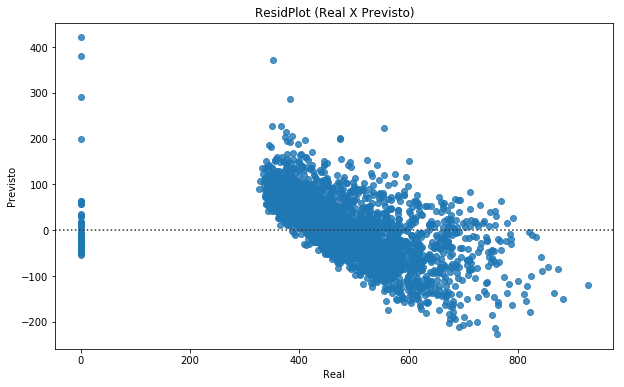

In [31]:
plt.figure(figsize=(10, 6))
plt.title("ResidPlot (Real X Previsto)")
residplot(x = 'Real', 
          y = 'Previsto',
          data=pd.DataFrame({"Real": y_test, 
                             "Previsto": predict_NeuralNet}))

plt.show()

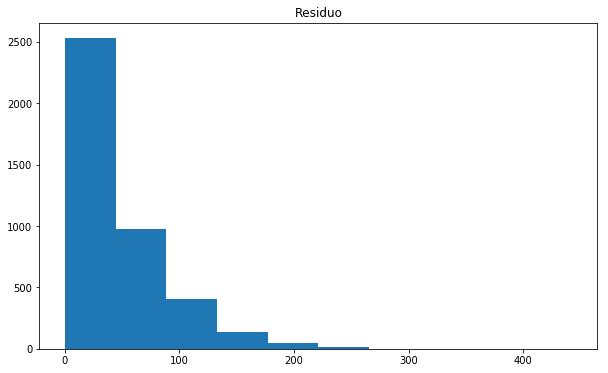

In [32]:
plt.figure(figsize=(10, 6))
plt.title("Residuo")
plt.hist(abs(y_test - predict_NeuralNet), bins=10)
plt.show()

### Apicando o modelo em teste

In [33]:
for indice in range(0, len(dadosTeste2.columns)):
    if ((list(X_train.columns))[indice] != (list(dadosTeste2.columns))[indice]):
        raise Exception("Erro no modelo")

In [34]:
predict = model_NeuralNet.predict(dadosTeste2)

resultado = pd.DataFrame({'NU_INSCRICAO': ID,
                          'NU_NOTA_MT': predict})

resultado.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,415.098599
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,441.303231
2,b38a03232f43b11c9d0788abaf060f7366053b6d,592.914360
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,-7.119351
4,715494628a50142ce8cb17191cfe6d0f3cae0934,556.494804


In [35]:
# Tratando valores negativos 
resultado.NU_NOTA_MT = resultado.NU_NOTA_MT.apply(lambda x: 0 if x < 0 else x)

In [36]:
resultado.shape

(4576, 2)

In [37]:
resultado.to_csv(path_or_buf = "./answer.csv", index = False)

### FIM